In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import glob

In [16]:
sns.set_context("talk", font_scale=1.0)

In [17]:
# Directory containing the JSON files
directory_path = 'validate/'

# List to store the processed data
all_experiments = []

# Iterate through all JSON files in the directory
for file_path in glob.glob(os.path.join(directory_path, '**/*.json'), recursive=True):
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    # Extract the model name from the file path
    model_name = os.path.basename(os.path.dirname(file_path)).split("_")[0]
    dataset_name = os.path.basename(file_path).split("_")[1].split(".")[0]
    
    for experiment in data['experiments']:
        # Flatten the dictionary to include metrics at the top level
        experiment_flat = {**experiment, **experiment.pop('metrics')}
        # Add the model name and dataset name to the experiment data
        experiment_flat['model'] = model_name
        experiment_flat['dataset'] = dataset_name
        # Append the processed experiment to the list
        all_experiments.append(experiment_flat)

# Create a DataFrame from the combined data
df = pd.DataFrame(all_experiments)

# Replace epsilons for early experiments where epsilon was rounded before saving
epsilon_replacements = {
    0.0000: 0.0039,
    0.0100: 0.0078,
    0.0200: 0.0157,
    0.0300: 0.0314
}
df['epsilon'] = df['epsilon'].replace(epsilon_replacements)

In [18]:
df["epsilon"].value_counts()

epsilon
0.0078    535
0.0039    491
0.0157    487
0.0314    478
0.0050    329
Name: count, dtype: int64

In [19]:
df = df.sort_values(by=['attack', 'model', 'norm', 'epsilon', 'iterations'])
df

,start_time,model,checkpoint,attack,targeted,end_time,duration,dataset,metrics,epe,...,own_epe_orig_preds,cosim_target,cosim_orig_preds,epe_ground_truth,own_epe_ground_truth,cosim_ground_truth,iterations,alpha,boxconstraint,conf_f1
566,2024-06-14 02:55:52,craft,kitti,bim,True,2024-06-14 03:11:14,00:15:22,kitti-2015,"{'epe': 31.98510574012995, 'px1': 0.1349306092...",31.985106,...,6.053097,0.000000,0.818341,5.010101,20.402908,0.175875,3.0,0.01,NaN,NaN
567,2024-06-14 02:55:52,craft,kitti,bim,True,2024-06-14 03:11:17,00:15:25,kitti-2015,"{'epe': 68.64081647396088, 'px1': 0.0996876801...",68.640816,...,6.096630,-0.797265,0.797265,5.023108,20.425057,0.174073,3.0,0.01,NaN,NaN
568,2024-06-14 03:14:17,craft,kitti,bim,False,2024-06-14 03:29:42,00:15:25,kitti-2015,"{'epe': 5.5202455791831015, 'px1': 0.219553580...",5.520246,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.01,NaN,NaN
574,2024-06-14 03:49:17,craft,kitti,bim,True,2024-06-14 04:04:45,00:15:27,kitti-2015,"{'epe': 65.72177811980248, 'px1': 0.0750032686...",65.721778,...,8.800045,-0.742253,0.742253,8.063324,19.284702,0.164288,3.0,0.01,NaN,NaN
575,2024-06-14 03:49:17,craft,kitti,bim,True,2024-06-14 04:04:46,00:15:28,kitti-2015,"{'epe': 29.13265760630369, 'px1': 0.1160052326...",29.132658,...,8.656841,0.000000,0.782579,7.985554,19.241393,0.169552,3.0,0.01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,2024-05-15 00:37:07,rpknet,kitti,pgd,False,2024-05-15 00:41:56,00:04:48,kitti-2015,"{'epe': 0.9459189750626683, 'px1': 0.826292059...",0.945919,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.00,NaN,NaN
437,2024-05-15 14:00:16,rpknet,kitti,pgd,False,2024-05-15 14:05:24,00:05:07,kitti-2015,"{'epe': 0.9459198679588735, 'px1': 0.826292699...",0.945920,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.00,NaN,NaN
419,2024-05-15 03:10:31,rpknet,kitti,pgd,True,2024-05-15 03:23:26,00:12:55,kitti-2015,"{'epe': 73.46305837273597, 'px1': 0.1021548892...",73.463058,...,NaN,-1.000000,1.000000,0.945920,NaN,0.182632,10.0,0.00,NaN,NaN
420,2024-05-15 03:14:32,rpknet,kitti,pgd,True,2024-05-15 03:27:37,00:13:04,kitti-2015,"{'epe': 36.73153132379055, 'px1': 0.1149840887...",36.731531,...,NaN,0.000000,1.000000,0.945921,NaN,0.182632,10.0,0.00,NaN,NaN


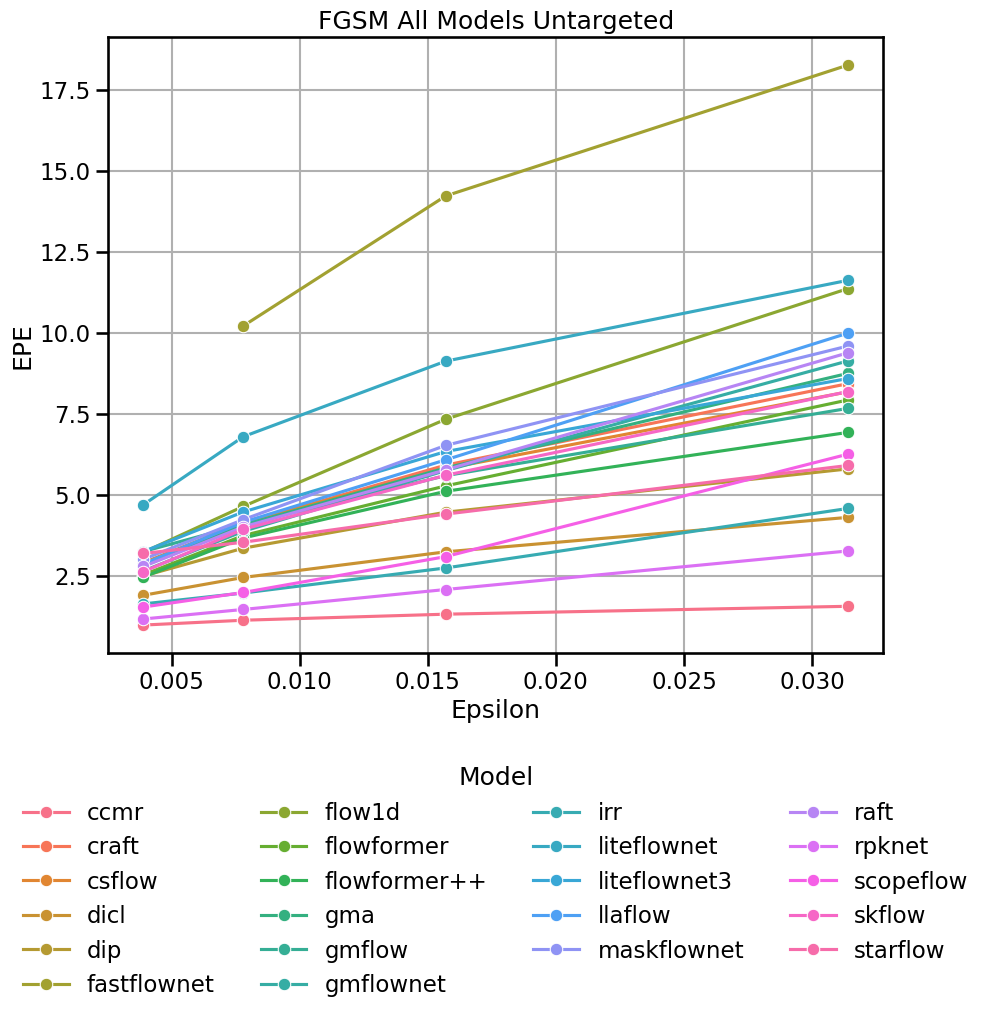

In [36]:
data = df.query("attack == 'fgsm' and norm == 'inf' and targeted == False and dataset == 'kitti-2015' and checkpoint == 'kitti'")

# Create the plot
plt.figure(figsize=(10, 8))
sns.lineplot(data=data, x='epsilon', y='epe', hue='model', marker='o')

# Customize the plot
plt.xlabel('Epsilon')
plt.ylabel('EPE')
plt.legend(title='Model')
plt.grid(True)
plt.title("FGSM All Models Untargeted")

# Adjust legend
plt.legend(title='Model', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=4, frameon=False)


# Show the plot
plt.savefig('graphs/FGSM All Models Untargeted.png', dpi=300, bbox_inches='tight')
plt.show()

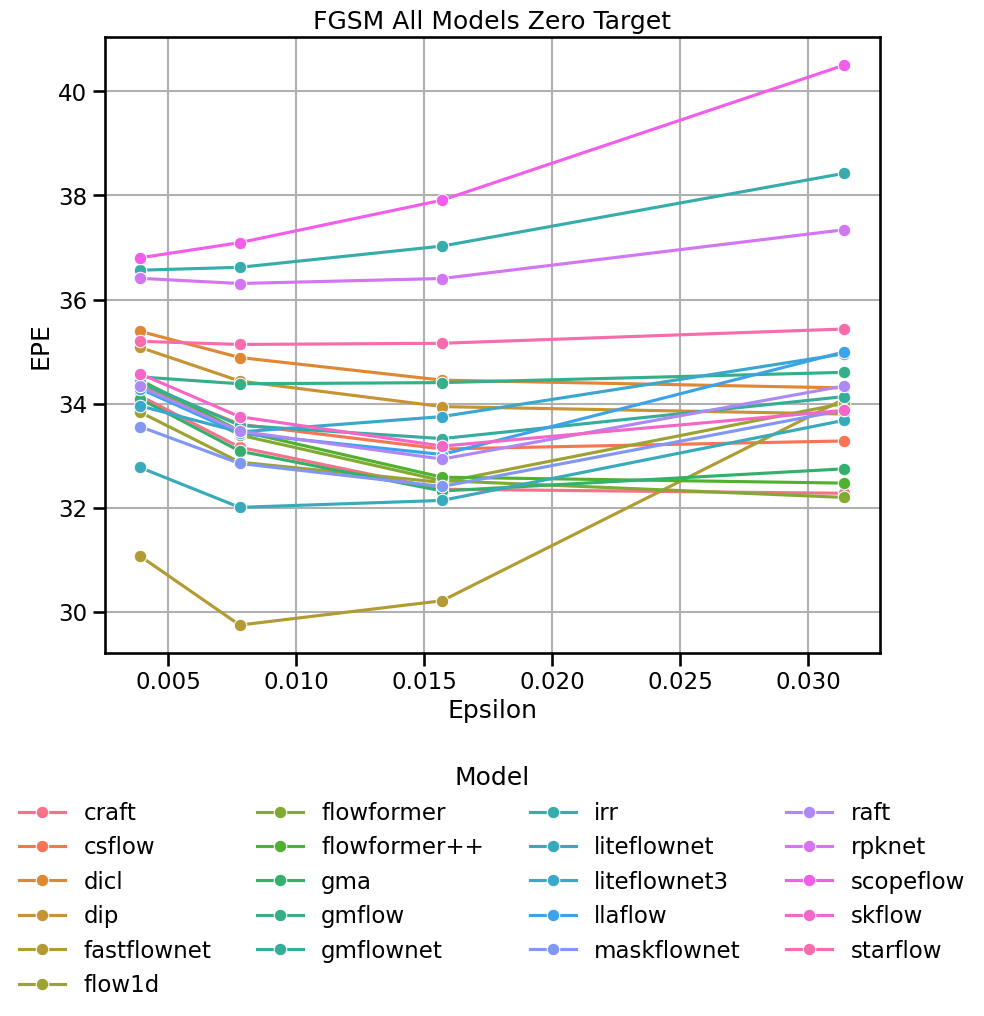

In [32]:
data = df.query("attack == 'fgsm' and norm == 'inf' and targeted == True and target == 'zero' and dataset == 'kitti-2015' and checkpoint == 'kitti'")

# Create the plot
plt.figure(figsize=(10, 8))
sns.lineplot(data=data, x='epsilon', y='epe', hue='model', marker='o')

# Customize the plot
plt.xlabel('Epsilon')
plt.ylabel('EPE')
plt.legend(title='Model')
plt.grid(True)
plt.title("FGSM All Models Zero Target")

# Adjust legend
plt.legend(title='Model', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=4, frameon=False)


# Show the plot
plt.savefig('graphs/FGSM All Models Zero Target.png', dpi=300, bbox_inches='tight')
plt.show()

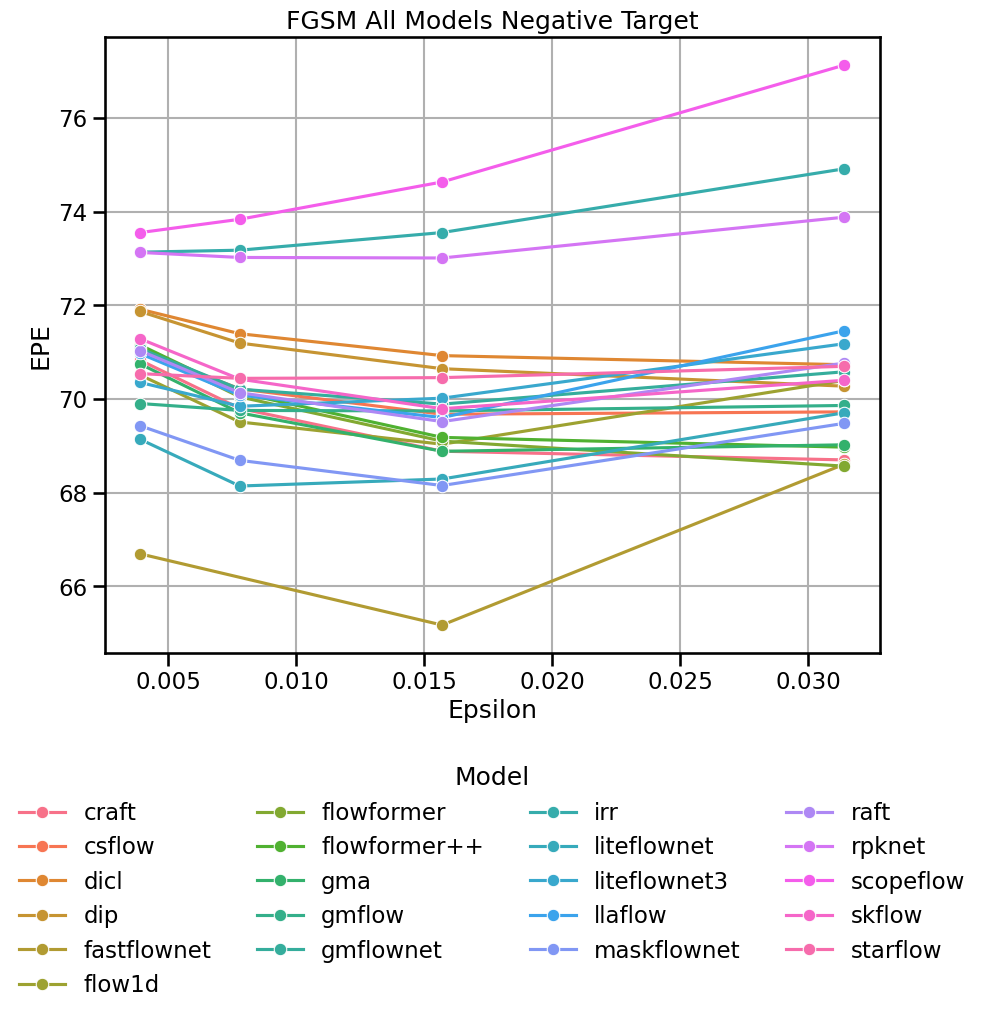

In [33]:
data = df.query("attack == 'fgsm' and norm == 'inf' and targeted == True and target == 'negative' and dataset == 'kitti-2015' and checkpoint == 'kitti'")

# Create the plot
plt.figure(figsize=(10, 8))
sns.lineplot(data=data, x='epsilon', y='epe', hue='model', marker='o')

# Customize the plot
plt.xlabel('Epsilon')
plt.ylabel('EPE')
plt.legend(title='Model')
plt.grid(True)
plt.title("FGSM All Models Negative Target")

# Adjust legend
plt.legend(title='Model', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=4, frameon=False)


# Show the plot
plt.savefig('graphs/FGSM All Models Negative Target.png', dpi=300, bbox_inches='tight')
plt.show()

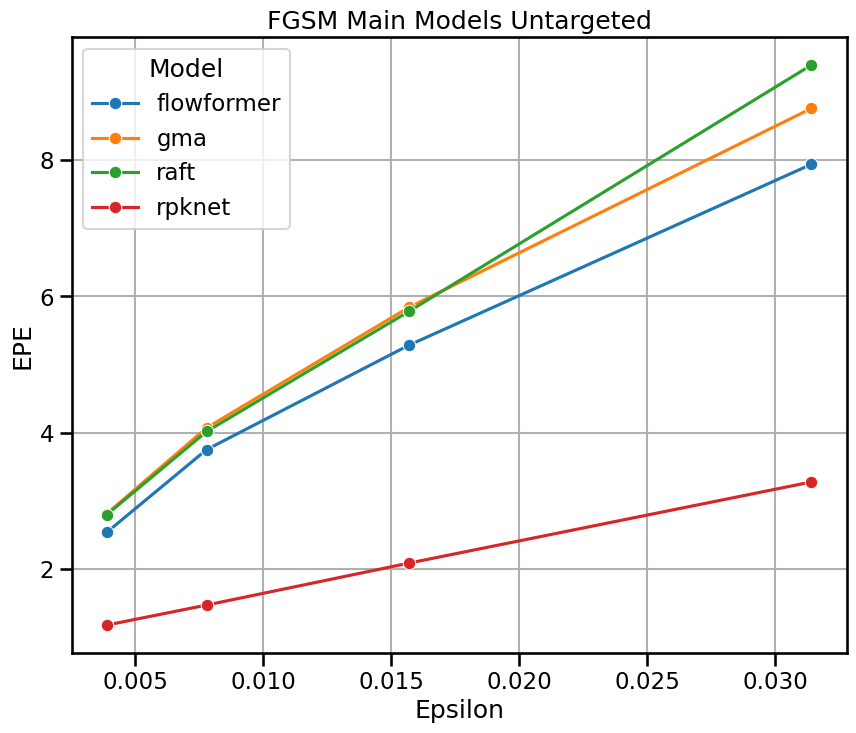

In [35]:
data = df.query("attack == 'fgsm' and norm == 'inf' and targeted == False and dataset == 'kitti-2015' and checkpoint == 'kitti'")
specific_models = ['raft', 'pwcnet', 'gma', 'flownet2', 'flowformer', 'rpknet']
# Further filter the DataFrame for the specific models
df_specific_models = data[data['model'].isin(specific_models)]

# Create the plot
plt.figure(figsize=(10, 8))
sns.lineplot(data=df_specific_models, x='epsilon', y='epe', hue='model', marker='o')

# Customize the plot
plt.xlabel('Epsilon')
plt.ylabel('EPE')
plt.legend(title='Model')
plt.grid(True)
plt.title('FGSM Main Models Untargeted')

# Show the plot
plt.savefig('graphs/FGSM Main Models Untargeted.png', dpi=300, bbox_inches='tight')
plt.show()

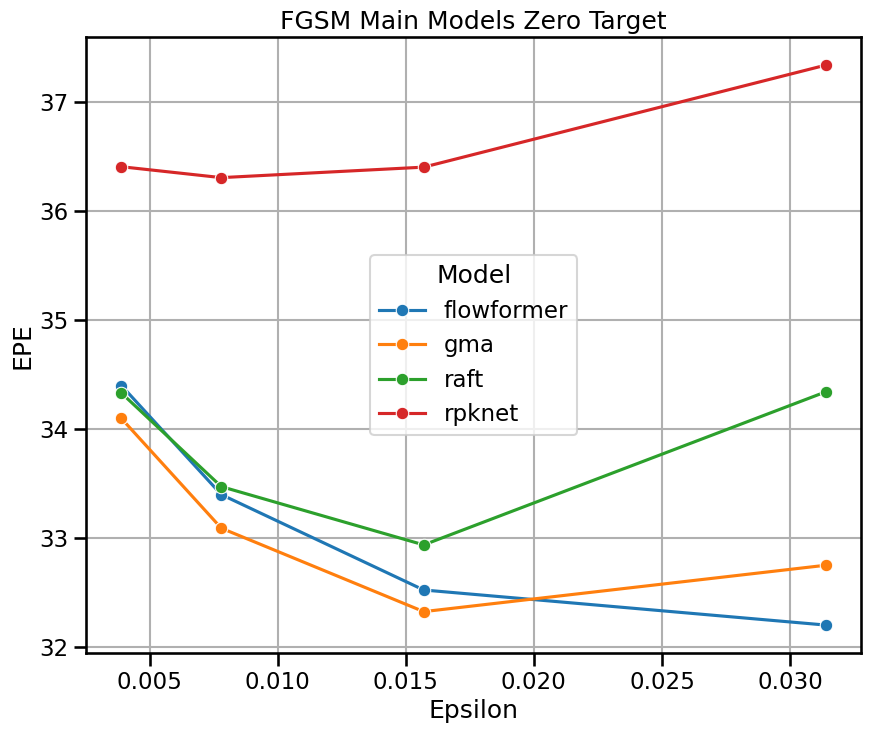

In [34]:
data = df.query("attack == 'fgsm' and norm == 'inf' and targeted == True and target == 'zero' and dataset == 'kitti-2015' and checkpoint == 'kitti'")
specific_models = ['raft', 'pwcnet', 'gma', 'flownet2', 'flowformer', 'rpknet']
# Further filter the DataFrame for the specific models
df_specific_models = data[data['model'].isin(specific_models)]

# Create the plot
plt.figure(figsize=(10, 8))
sns.lineplot(data=df_specific_models, x='epsilon', y='epe', hue='model', marker='o')

# Customize the plot
plt.xlabel('Epsilon')
plt.ylabel('EPE')
plt.legend(title='Model')
plt.grid(True)
plt.title('FGSM Main Models Zero Target')

# Show the plot
plt.savefig('graphs/FGSM Main Models Zero Target.png', dpi=300, bbox_inches='tight')
plt.show()

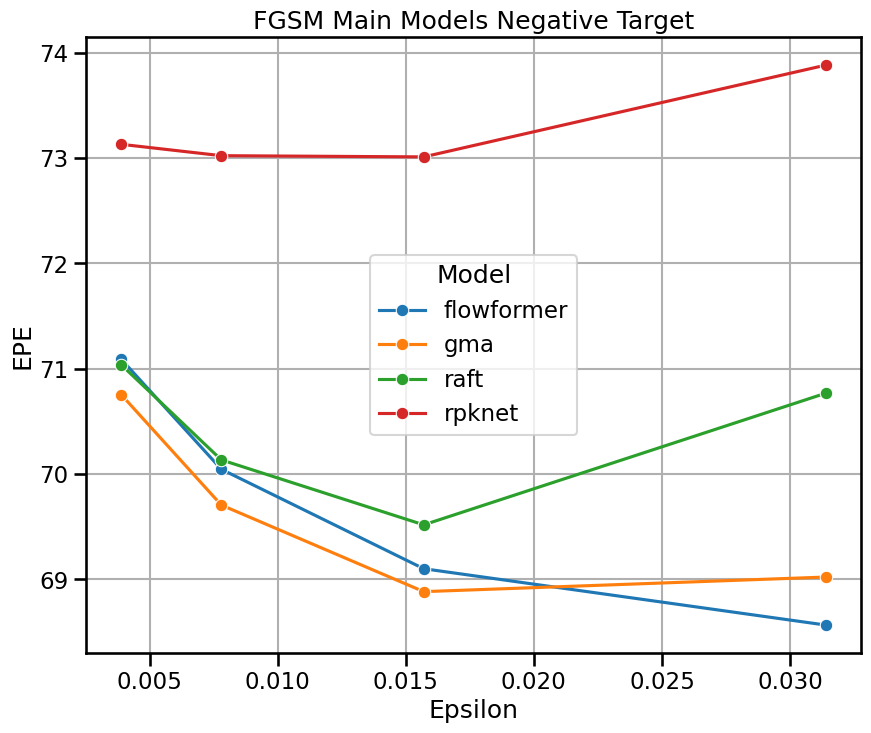

In [37]:
data = df.query("attack == 'fgsm' and norm == 'inf' and targeted == True and target == 'negative' and dataset == 'kitti-2015' and checkpoint == 'kitti'")
specific_models = ['raft', 'pwcnet', 'gma', 'flownet2', 'flowformer', 'rpknet']
# Further filter the DataFrame for the specific models
df_specific_models = data[data['model'].isin(specific_models)]

# Create the plot
plt.figure(figsize=(10, 8))
sns.lineplot(data=df_specific_models, x='epsilon', y='epe', hue='model', marker='o')

# Customize the plot
plt.xlabel('Epsilon')
plt.ylabel('EPE')
plt.legend(title='Model')
plt.grid(True)
plt.title('FGSM Main Models Negative Target')

# Show the plot
plt.savefig('graphs/FGSM Main Models Negative Target.png', dpi=300, bbox_inches='tight')
plt.show()

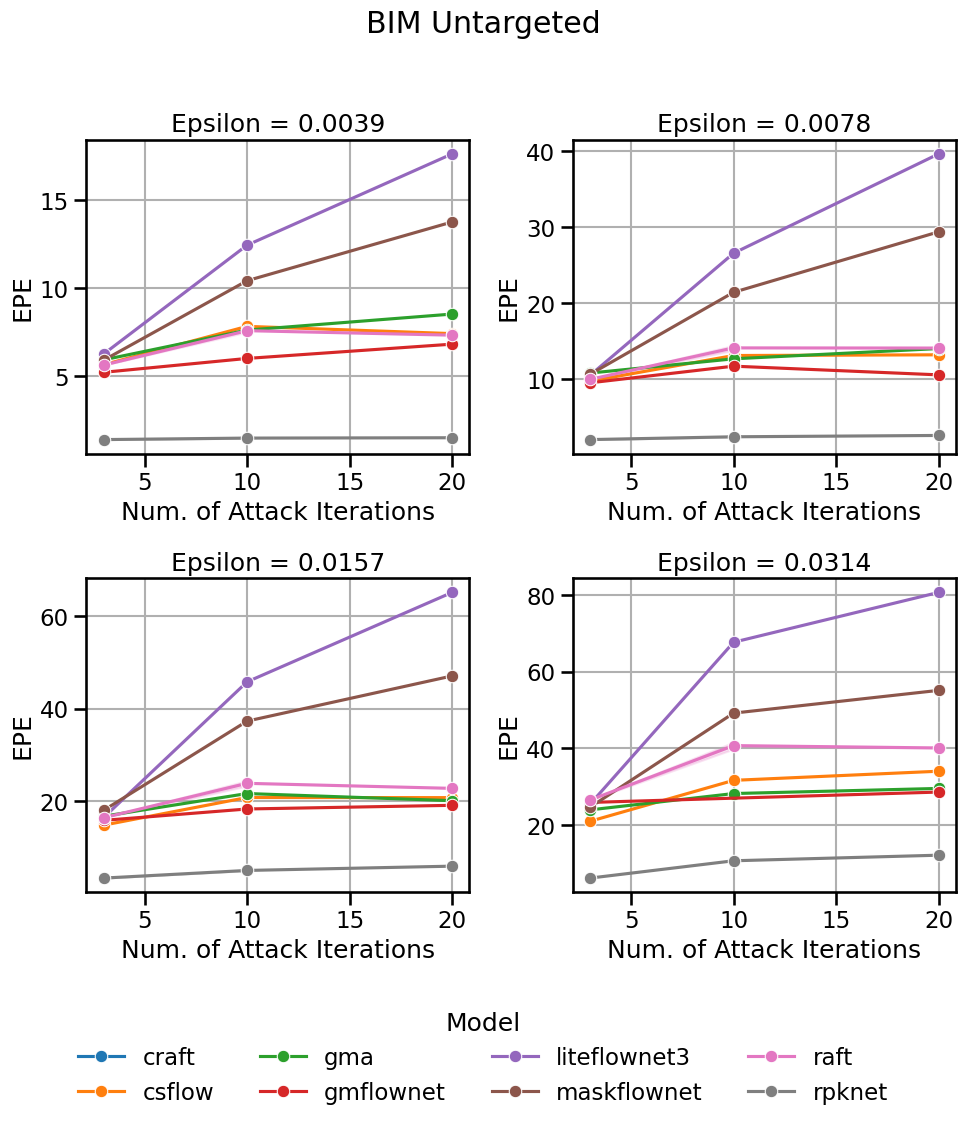

In [23]:
epsilon_values = [0.0039, 0.0078, 0.0157, 0.0314]
data = df.query("attack == 'bim' and norm == 'inf' and targeted == False and dataset == 'kitti-2015' and checkpoint == 'kitti'")

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('BIM Untargeted')


for ax, epsilon in zip(axes.flatten(), epsilon_values):
    # Create the plot for each epsilon
    sns.lineplot(data=data.query(f"epsilon == {epsilon}"), x='iterations', y='epe', hue='model', marker='o', ax=ax)
    ax.set_title(f'Epsilon = {epsilon}')
    ax.set_xlabel('Num. of Attack Iterations')
    ax.set_ylabel('EPE')
    ax.grid(True)

# Remove individual legends by setting legend to False in sns.lineplot
for ax in axes.flatten():
    ax.legend().remove()

# Adjust the legend position and add it to the figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.001), ncol=4, frameon=False, title='Model')


# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title and legend
plt.savefig('graphs/BIM Untargeted.png', dpi=300, bbox_inches='tight')
plt.show()

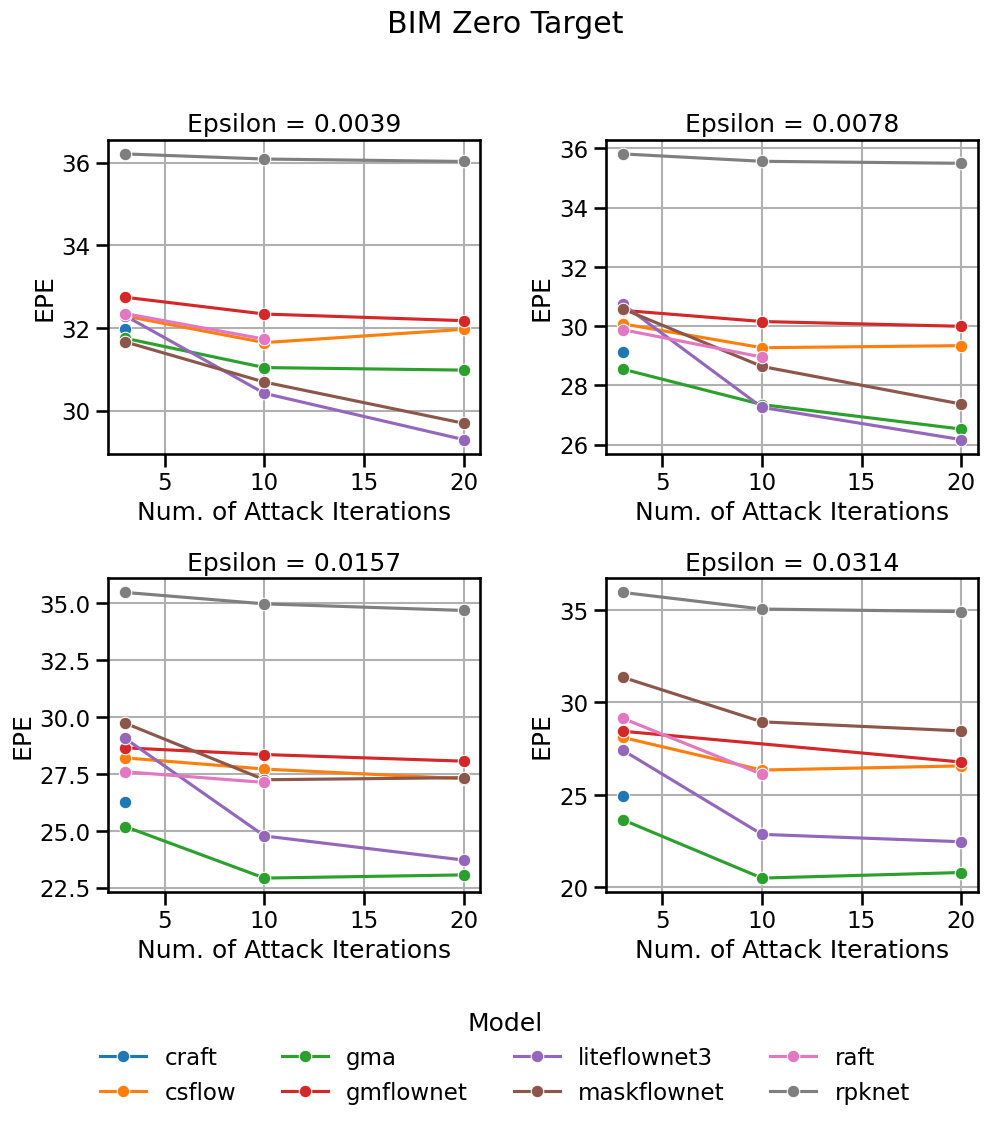

In [24]:
epsilon_values = [0.0039, 0.0078, 0.0157, 0.0314]
data = df.query("attack == 'bim' and norm == 'inf' and targeted == True and target == 'zero' and dataset == 'kitti-2015' and checkpoint == 'kitti'")

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('BIM Zero Target')


for ax, epsilon in zip(axes.flatten(), epsilon_values):
    # Create the plot for each epsilon
    sns.lineplot(data=data.query(f"epsilon == {epsilon}"), x='iterations', y='epe', hue='model', marker='o', ax=ax)
    ax.set_title(f'Epsilon = {epsilon}')
    ax.set_xlabel('Num. of Attack Iterations')
    ax.set_ylabel('EPE')
    ax.grid(True)

# Remove individual legends by setting legend to False in sns.lineplot
for ax in axes.flatten():
    ax.legend().remove()

# Adjust the legend position and add it to the figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.001), ncol=4, frameon=False, title='Model')


# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title and legend
plt.savefig('graphs/BIM Zero Target.png', dpi=300, bbox_inches='tight')
plt.show()

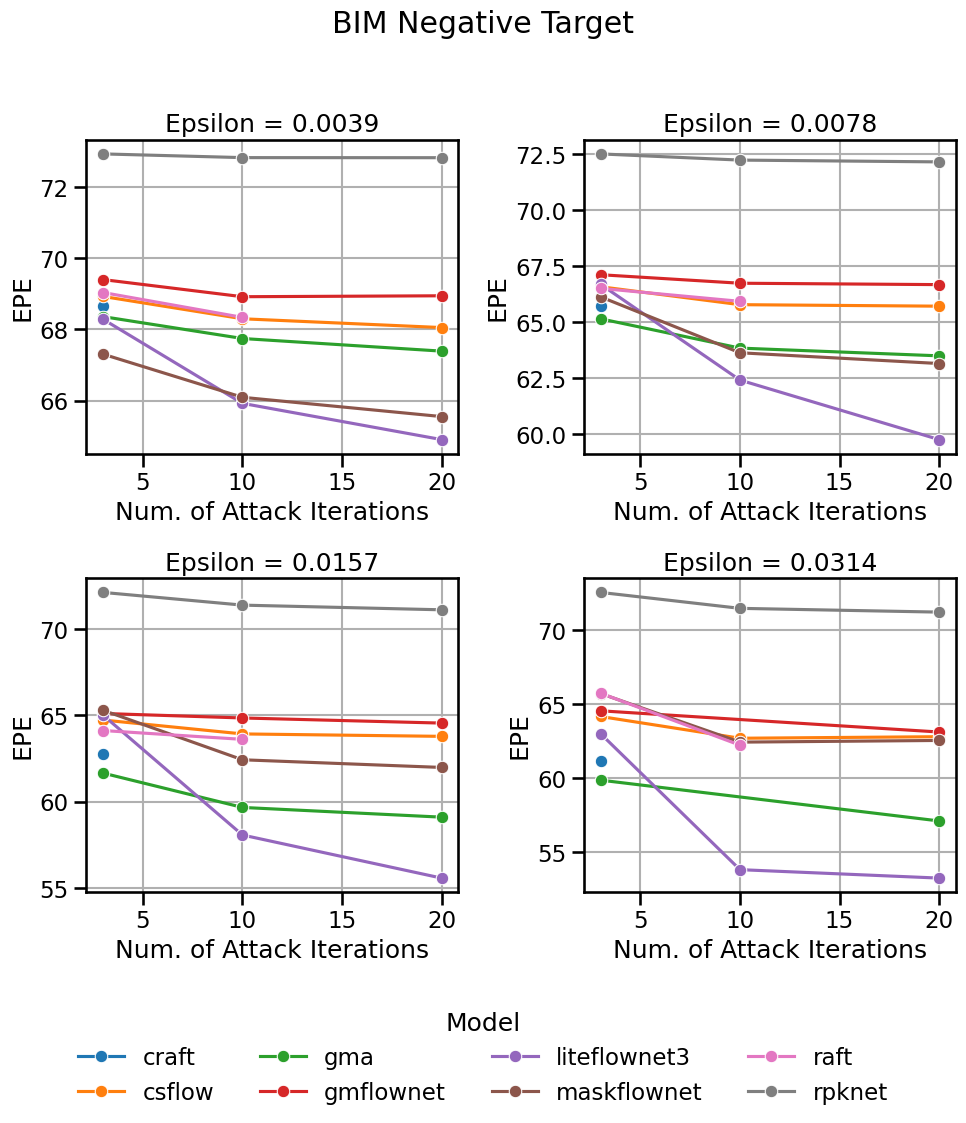

In [25]:
epsilon_values = [0.0039, 0.0078, 0.0157, 0.0314]
data = df.query("attack == 'bim' and norm == 'inf' and targeted == True and target == 'negative' and dataset == 'kitti-2015' and checkpoint == 'kitti'")

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('BIM Negative Target')


for ax, epsilon in zip(axes.flatten(), epsilon_values):
    # Create the plot for each epsilon
    sns.lineplot(data=data.query(f"epsilon == {epsilon}"), x='iterations', y='epe', hue='model', marker='o', ax=ax)
    ax.set_title(f'Epsilon = {epsilon}')
    ax.set_xlabel('Num. of Attack Iterations')
    ax.set_ylabel('EPE')
    ax.grid(True)

# Remove individual legends by setting legend to False in sns.lineplot
for ax in axes.flatten():
    ax.legend().remove()

# Adjust the legend position and add it to the figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.001), ncol=4, frameon=False, title='Model')


# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title and legend
plt.savefig('graphs/BIM Negative Target.png', dpi=300, bbox_inches='tight')
plt.show()

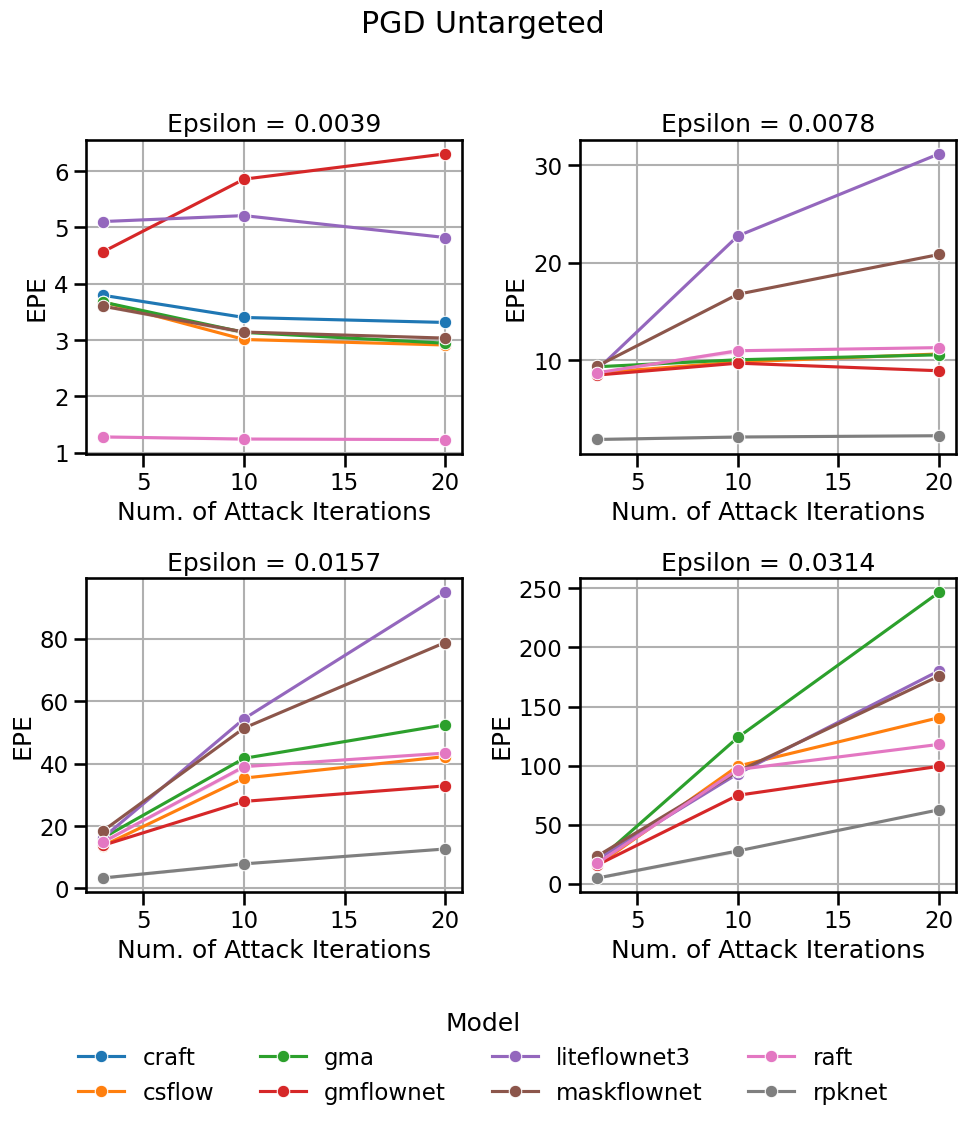

In [26]:
epsilon_values = [0.0039, 0.0078, 0.0157, 0.0314]
data = df.query("attack == 'pgd' and norm == 'inf' and targeted == False and dataset == 'kitti-2015' and checkpoint == 'kitti'")

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('PGD Untargeted')


for ax, epsilon in zip(axes.flatten(), epsilon_values):
    # Create the plot for each epsilon
    sns.lineplot(data=data.query(f"epsilon == {epsilon}"), x='iterations', y='epe', hue='model', marker='o', ax=ax)
    ax.set_title(f'Epsilon = {epsilon}')
    ax.set_xlabel('Num. of Attack Iterations')
    ax.set_ylabel('EPE')
    ax.grid(True)

# Remove individual legends by setting legend to False in sns.lineplot
for ax in axes.flatten():
    ax.legend().remove()

# Adjust the legend position and add it to the figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.001), ncol=4, frameon=False, title='Model')


# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title and legend
plt.savefig('graphs/PGD Untargeted.png', dpi=300, bbox_inches='tight')
plt.show()

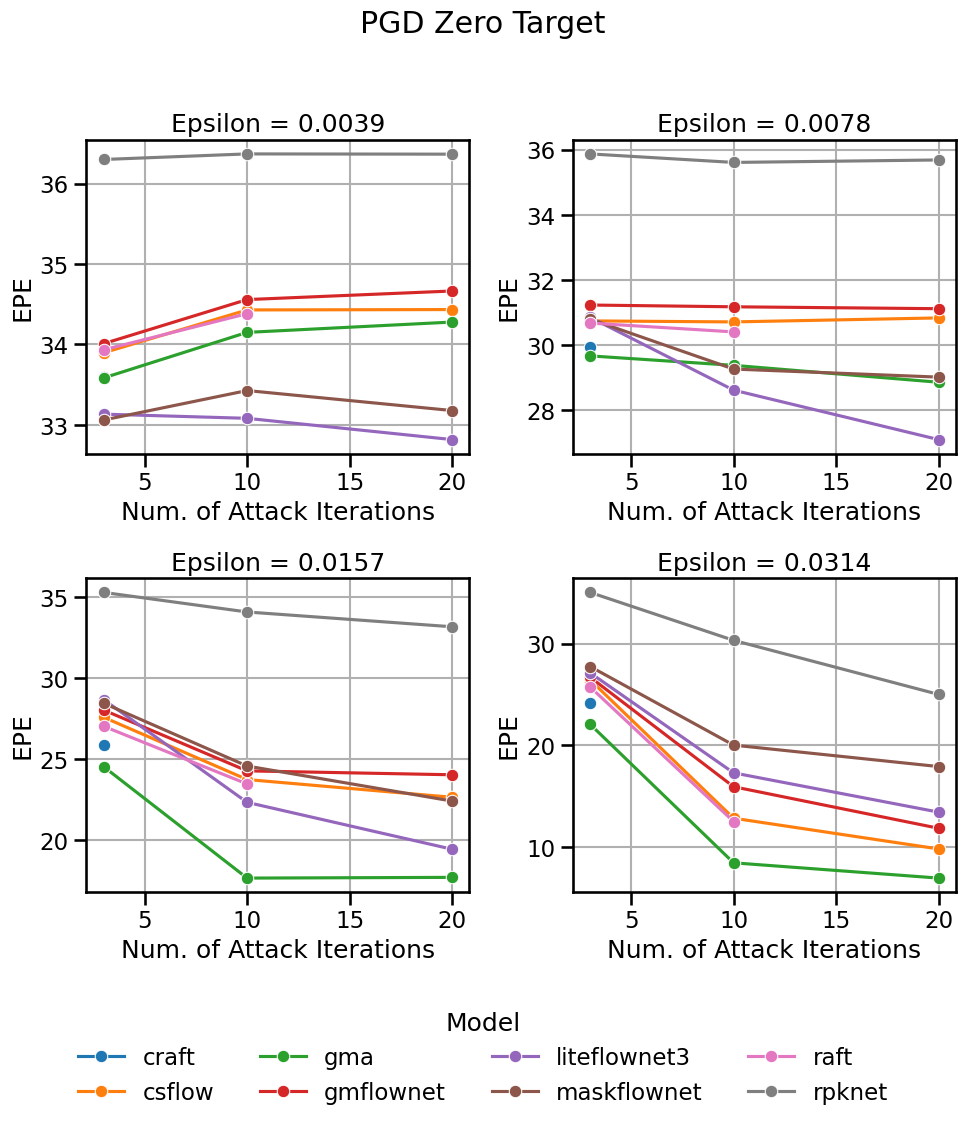

In [27]:
epsilon_values = [0.0039, 0.0078, 0.0157, 0.0314]
data = df.query("attack == 'pgd' and norm == 'inf' and targeted == True and target == 'zero' and dataset == 'kitti-2015' and checkpoint == 'kitti'")

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('PGD Zero Target')


for ax, epsilon in zip(axes.flatten(), epsilon_values):
    # Create the plot for each epsilon
    sns.lineplot(data=data.query(f"epsilon == {epsilon}"), x='iterations', y='epe', hue='model', marker='o', ax=ax)
    ax.set_title(f'Epsilon = {epsilon}')
    ax.set_xlabel('Num. of Attack Iterations')
    ax.set_ylabel('EPE')
    ax.grid(True)

# Remove individual legends by setting legend to False in sns.lineplot
for ax in axes.flatten():
    ax.legend().remove()

# Adjust the legend position and add it to the figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.001), ncol=4, frameon=False, title='Model')


# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title and legend
plt.savefig('graphs/PGD Zero Target.png', dpi=300, bbox_inches='tight')
plt.show()

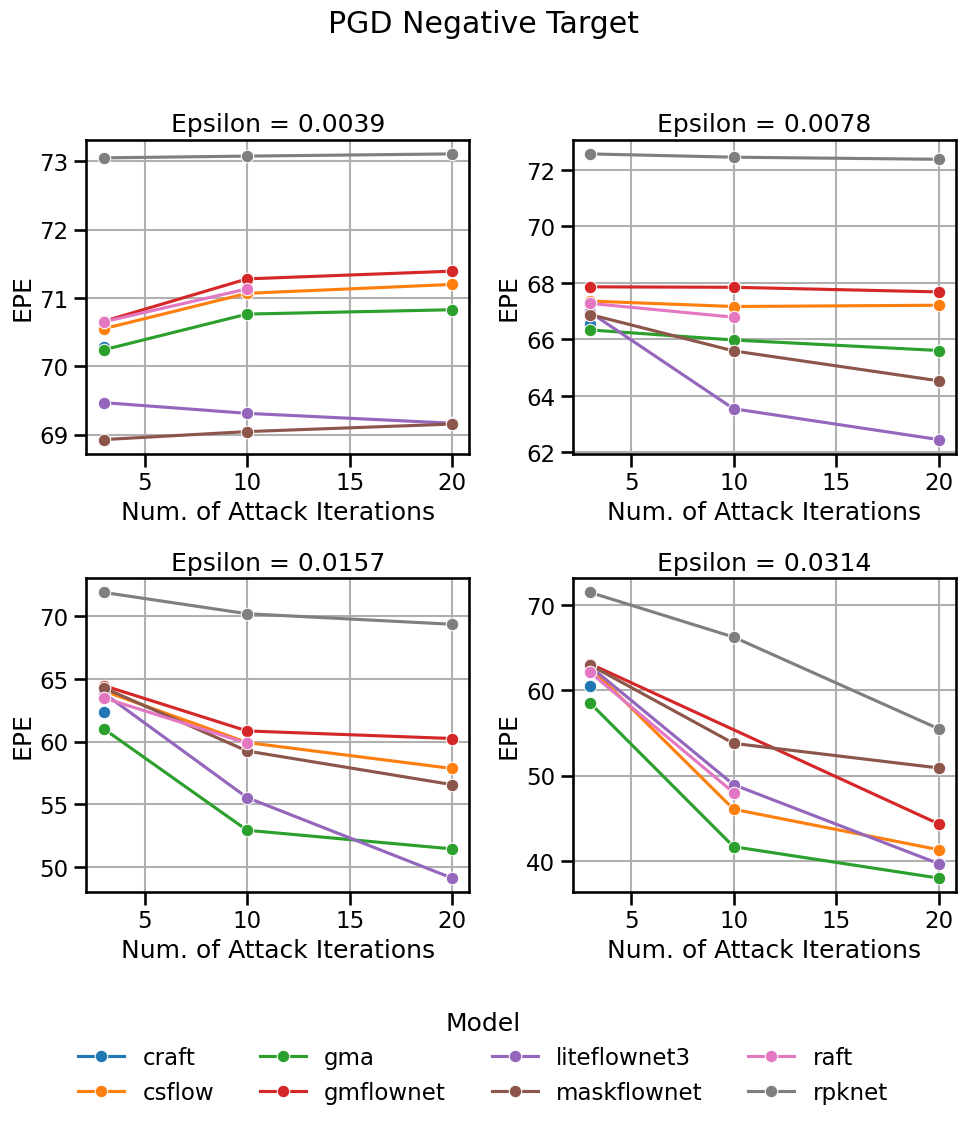

In [28]:
epsilon_values = [0.0039, 0.0078, 0.0157, 0.0314]
data = df.query("attack == 'pgd' and norm == 'inf' and targeted == True and target == 'negative' and dataset == 'kitti-2015' and checkpoint == 'kitti'")

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('PGD Negative Target')


for ax, epsilon in zip(axes.flatten(), epsilon_values):
    # Create the plot for each epsilon
    sns.lineplot(data=data.query(f"epsilon == {epsilon}"), x='iterations', y='epe', hue='model', marker='o', ax=ax)
    ax.set_title(f'Epsilon = {epsilon}')
    ax.set_xlabel('Num. of Attack Iterations')
    ax.set_ylabel('EPE')
    ax.grid(True)

# Remove individual legends by setting legend to False in sns.lineplot
for ax in axes.flatten():
    ax.legend().remove()

# Adjust the legend position and add it to the figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.001), ncol=4, frameon=False, title='Model')


# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title and legend
plt.savefig('graphs/PGD Zero Target.png', dpi=300, bbox_inches='tight')
plt.show()

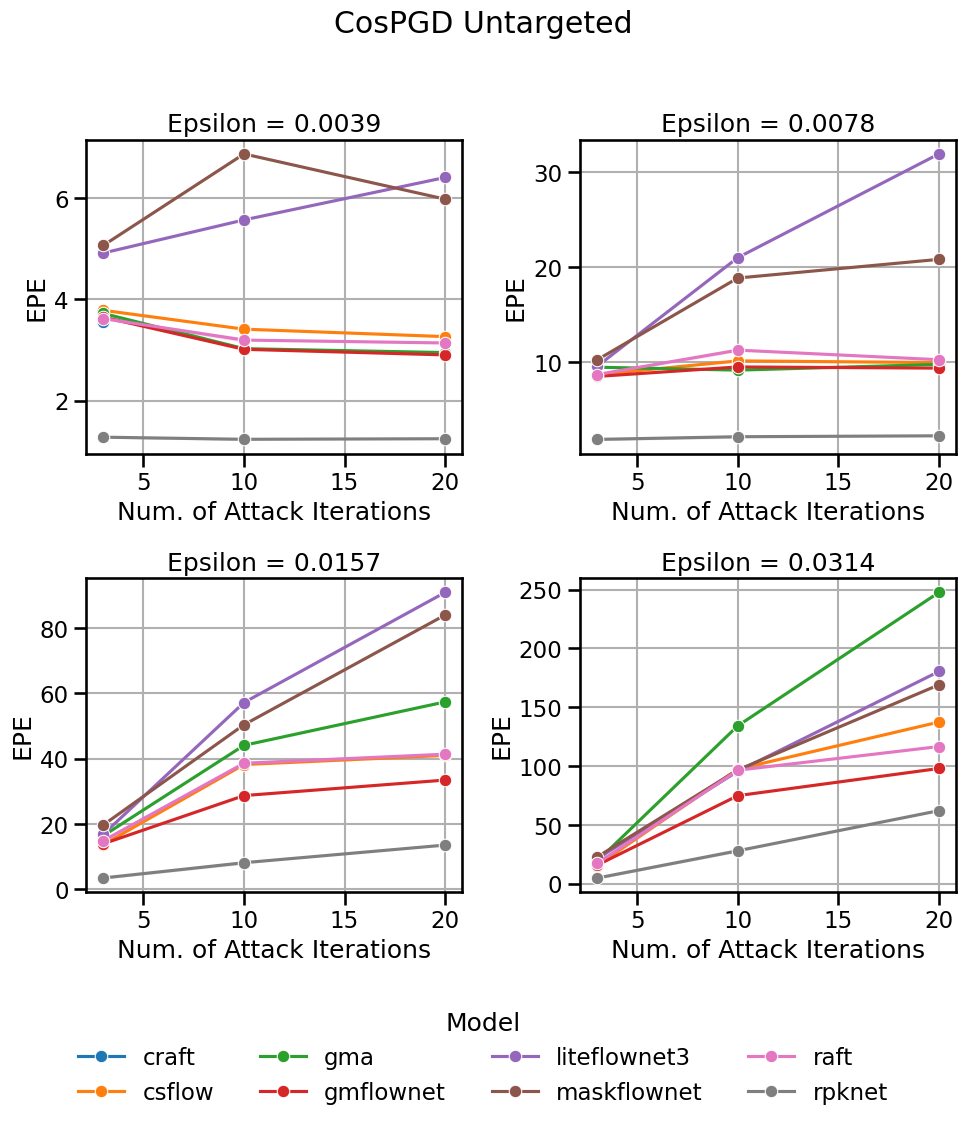

In [29]:
epsilon_values = [0.0039, 0.0078, 0.0157, 0.0314]
data = df.query("attack == 'cospgd' and norm == 'inf' and targeted == False and dataset == 'kitti-2015' and checkpoint == 'kitti'")

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('CosPGD Untargeted')


for ax, epsilon in zip(axes.flatten(), epsilon_values):
    # Create the plot for each epsilon
    sns.lineplot(data=data.query(f"epsilon == {epsilon}"), x='iterations', y='epe', hue='model', marker='o', ax=ax)
    ax.set_title(f'Epsilon = {epsilon}')
    ax.set_xlabel('Num. of Attack Iterations')
    ax.set_ylabel('EPE')
    ax.grid(True)

# Remove individual legends by setting legend to False in sns.lineplot
for ax in axes.flatten():
    ax.legend().remove()

# Adjust the legend position and add it to the figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.001), ncol=4, frameon=False, title='Model')


# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title and legend
plt.savefig('graphs/CosPGD Untargeted.png', dpi=300, bbox_inches='tight')
plt.show()

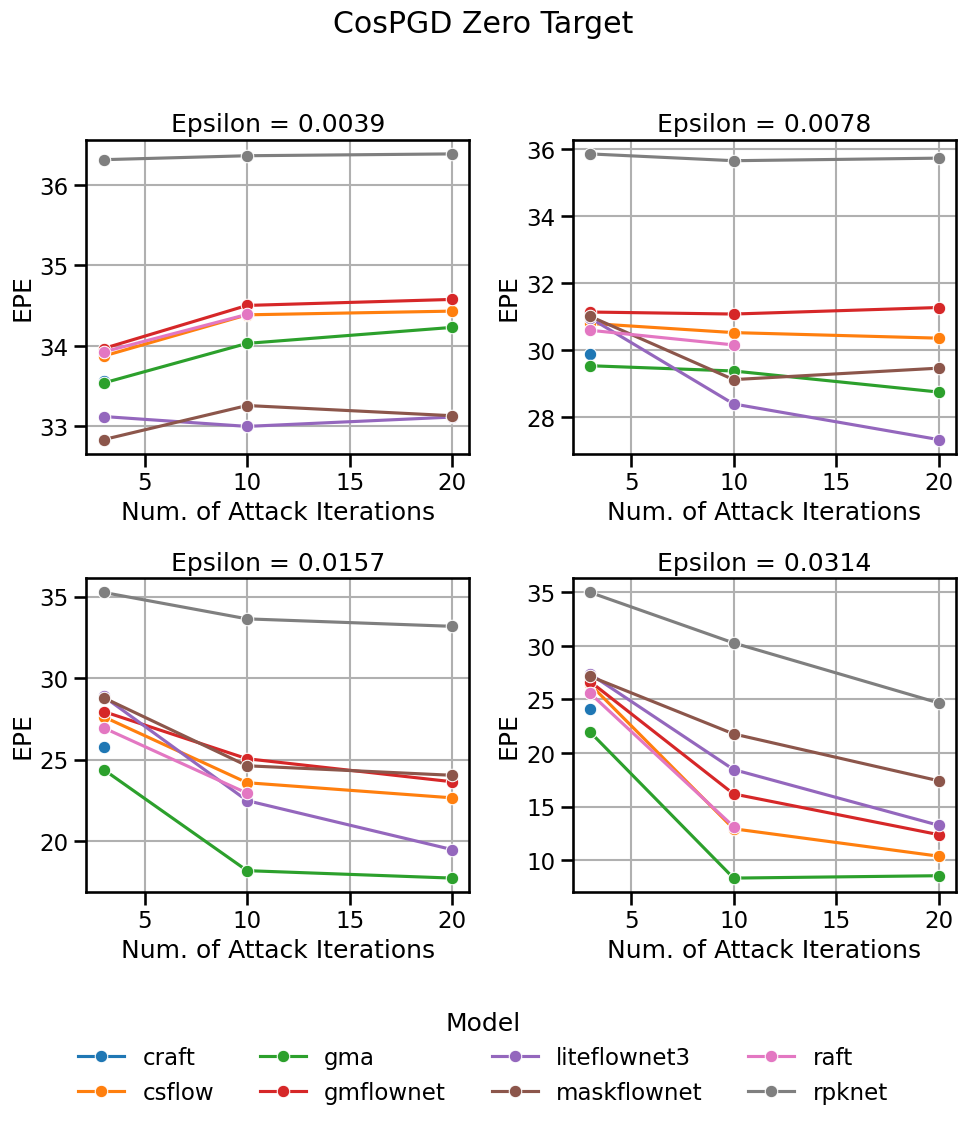

In [30]:
epsilon_values = [0.0039, 0.0078, 0.0157, 0.0314]
data = df.query("attack == 'cospgd' and norm == 'inf' and targeted == True and target == 'zero' and dataset == 'kitti-2015' and checkpoint == 'kitti'")

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('CosPGD Zero Target')


for ax, epsilon in zip(axes.flatten(), epsilon_values):
    # Create the plot for each epsilon
    sns.lineplot(data=data.query(f"epsilon == {epsilon}"), x='iterations', y='epe', hue='model', marker='o', ax=ax)
    ax.set_title(f'Epsilon = {epsilon}')
    ax.set_xlabel('Num. of Attack Iterations')
    ax.set_ylabel('EPE')
    ax.grid(True)

# Remove individual legends by setting legend to False in sns.lineplot
for ax in axes.flatten():
    ax.legend().remove()

# Adjust the legend position and add it to the figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.001), ncol=4, frameon=False, title='Model')


# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title and legend
plt.savefig('graphs/CosPGD Zero Target.png', dpi=300, bbox_inches='tight')
plt.show()

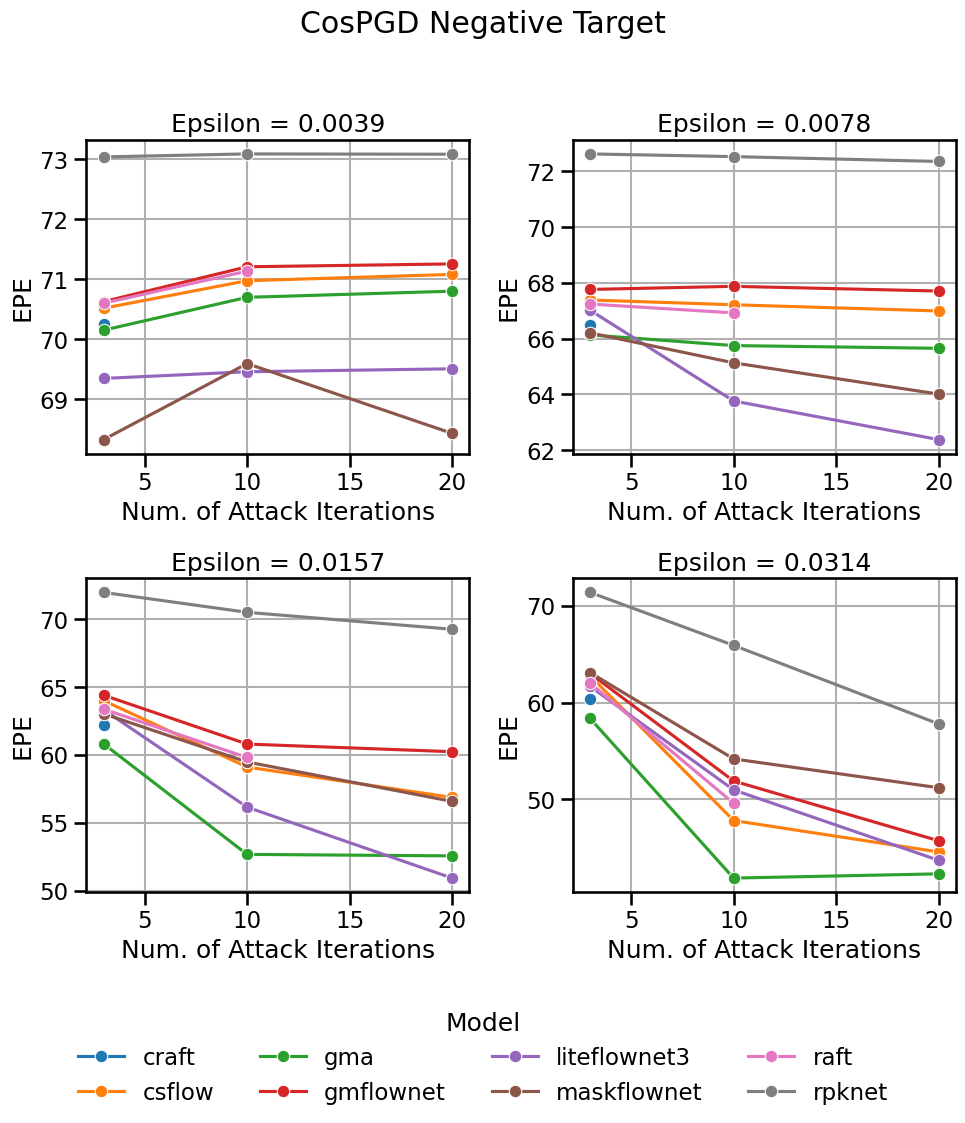

In [31]:
epsilon_values = [0.0039, 0.0078, 0.0157, 0.0314]
data = df.query("attack == 'cospgd' and norm == 'inf' and targeted == True and target == 'negative' and dataset == 'kitti-2015' and checkpoint == 'kitti'")

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('CosPGD Negative Target')


for ax, epsilon in zip(axes.flatten(), epsilon_values):
    # Create the plot for each epsilon
    sns.lineplot(data=data.query(f"epsilon == {epsilon}"), x='iterations', y='epe', hue='model', marker='o', ax=ax)
    ax.set_title(f'Epsilon = {epsilon}')
    ax.set_xlabel('Num. of Attack Iterations')
    ax.set_ylabel('EPE')
    ax.grid(True)

# Remove individual legends by setting legend to False in sns.lineplot
for ax in axes.flatten():
    ax.legend().remove()

# Adjust the legend position and add it to the figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.001), ncol=4, frameon=False, title='Model')


# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title and legend
plt.savefig('graphs/CosPGD Negative Target.png', dpi=300, bbox_inches='tight')
plt.show()